## Comparing the usage and value of information sources

This notebook compares the responses to Q129 (information sources used) to Q145 (most valuable information sources). The response options for both questions have been grouped into the same 6 categories. See the two other notebooks for the grouping step.

In [1]:
import pandas as pd
import json
import elasticsearch
from matplotlib import pyplot as plt
import collections
import numpy as np
%matplotlib inline

# This file was created in the notebook "Q129_grouped"
df129= pd.read_csv("processed_data/Q129InformationSources.csv")
# This file was created in the notebook "Q145_grouped"
df145= pd.read_csv("processed_data/Q145InformationSatisfaction.csv")

# Names of the 6 categories
categoryNames = collections.OrderedDict([
    ("experiments", "Own experimentation"),
    ("sharing", "Informal sharing"),
    ("training", "Face-to-face training"),
    ("print", "Print media"),
    ("broadcast", "Broadcast media"),
    ("digital", "Digital media")
])

### How does value compare to use?

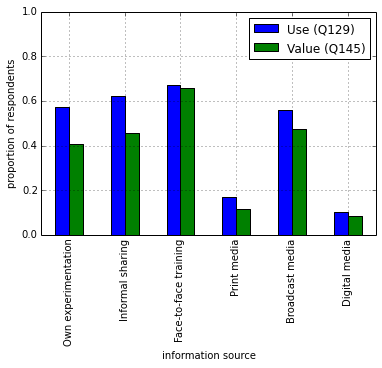

In [2]:
results = []
for category in categoryNames:
    results.append({
        "category": categoryNames[category],
        "Use (Q129)": np.mean(df129[category].values),
        "Value (Q145)": np.mean(df145[category].values)
    })

res_df = pd.DataFrame(results)
res_df = res_df.set_index("category")

res_df.plot(kind="bar", grid="on")
plt.ylim(0,1)
plt.ylabel("proportion of respondents")
plt.xlabel("information source");

### Value of information sources among users or non-users of the source

The above graph shows that for each category, slightly more farmers use the information source than consider it "among the most valuable". However, it doesn't show whether the farmers rating the source as valuable are the same farmers using it. Farmers could rate the sources as valuable in Q145 even if they had not used them.

In the graph below, the proportion of farmers who valued each category of information is shown separately for users and non-users of that category.

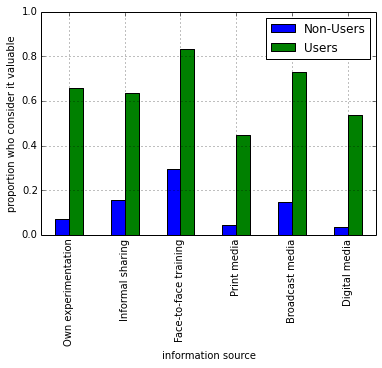

In [3]:
results = []
for category in categoryNames:
    results.append({
        "category": categoryNames[category],
        "Users": np.mean(df145[category][df129[category]==1].values),
        "Non-Users": np.mean(df145[category][df129[category]==0].values)
    })

res_df = pd.DataFrame(results)
res_df = res_df.set_index("category")

res_df.plot(kind="bar", grid="on", figsize=(6,4))
plt.ylim(0,1)
plt.ylabel("proportion who consider it valuable")
plt.xlabel("information source");

In-person training was most likely to be rated as vauable, whether a farmer had experienced the training or not. Among those who used the training, over 80% rated it as valuable. Among those who had not yet experienced any face-to-face training, 30% rated it as valuable.